<a href="https://colab.research.google.com/github/atedstone/unil_envi_ggl_hydrology_practicals/blob/main/supraglacial_q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical: Interpreting supraglacial melt and discharge

In [1]:
# Install ipympl so that we can use interactive plots
!pip install ipympl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.8/515.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.8 MB/s eta 0:00:00


**Important!** If this is the first time you are running the Notebook, restart your session **now** using the menu 'Runtime... Restart session'. You don't need to run the above cell again afterwards, you can continue with the rest of the Notebook.

In [2]:
# Activate ipympl in Colab
from google.colab import output
output.enable_custom_widget_manager()

In [3]:
# Packages for data download
import requests
import os

In [10]:
# Packages for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget


ValueError: Key backend: 'module://ipympl.backend_nbagg' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template', 'inline']

## Download the data

In [11]:
files = {'Moulin_L41A_ice_ablation.tab': 'https://doi.pangaea.de/10.1594/PANGAEA.926842?format=textfile',
         'Moulin_L41A_Q.tab': 'https://doi.pangaea.de/10.1594/PANGAEA.926844?format=textfile',
         'KAN_M_hour_seb_2012.csv': 'https://unils-my.sharepoint.com/:x:/g/personal/andrew_tedstone_unil_ch/EX_-Q31D461Fq9iKzeswDGwBKm8wQMshDDSODn2pAAviYQ?download=1'
}
for f in files:
    if os.path.exists(f):
        print('File already downloaded.')
    else:
        print('Downloading...')
        response = requests.get(files[f])
        open(f, 'wb').write(response.content)
print('Done.')

Downloading...
Downloading...
Downloading...
Done.


## Open the datasets using Pandas

In [12]:
ablation = pd.read_csv('Moulin_L41A_ice_ablation.tab', sep=r'\t', skiprows=19, parse_dates=True, index_col=0, engine='python')

In [13]:
discharge = pd.read_csv('Moulin_L41A_Q.tab', sep=r'\t', skiprows=20, parse_dates=True, index_col=0, engine='python')

In [14]:
seb = pd.read_csv('KAN_M_hour_seb_2012.csv', parse_dates=True, index_col='time')

## Initial look at dataset structure

In [15]:
# In Jupyter Notebook, entering the name of a Pandas DataFrame prints its head and foot to screen
ablation

,Ablation [mm],Ablation [±]
Date/Time,,
2012-05-30,36,6
2012-05-31,32,15
2012-06-01,21,9
2012-06-02,11,9
2012-06-03,3,6
...,...,...
2012-08-07,16,11
2012-08-08,11,5
2012-08-09,6,6


In [20]:
# We can also get some basic statistics calculated over the whole DataFrame
ablation.describe()

,Ablation [mm],Ablation [±]
count,74.000000,74.000000
mean,24.675676,8.445946
std,17.230992,3.896405
min,-8.000000,2.000000
25%,11.250000,5.250000
50%,22.500000,8.000000
75%,33.000000,11.000000
max,91.000000,19.000000


In [17]:
discharge

,Q hour mean [m**3/s],Q hour min [m**3/s],Q hour max [m**3/s]
Date/Time,,,
2012-06-16 13:00:00,1.175341,0.316950,0.433981
2012-06-16 14:00:00,1.260791,0.327451,0.442334
2012-06-16 15:00:00,1.451227,0.348790,0.459140
2012-06-16 16:00:00,1.761579,0.379919,0.484387
2012-06-16 17:00:00,2.206190,0.423898,0.524717
...,...,...,...
2012-08-09 16:00:00,0.916114,0.280071,0.403396
2012-08-09 17:00:00,0.978514,0.289761,0.411665
2012-08-09 18:00:00,1.125895,0.310547,0.428826


Notice that there are three columns of data in the discharge dataset. The columns with 'min' and 'max' in the titles are actually the - and + error bounds corresponding to the 95% confidence intervals. They are *not* the absolute min and max values. See the plotting code below for an example of how to use these columns.

In [18]:
seb

,dlhf_u,dshf_u,swnet,alb
time,,,,
2012-06-15 00:00:00,-8.7908,31.6132,6.9147,0.623286
2012-06-15 01:00:00,-5.6955,24.8596,4.4630,0.609895
2012-06-15 02:00:00,-6.5406,32.0058,2.3887,0.600003
2012-06-15 03:00:00,-8.3635,37.1120,2.2630,0.538465
2012-06-15 04:00:00,-1.0549,40.5169,3.8344,0.573429
...,...,...,...,...
2012-08-15 19:00:00,3.5619,29.7293,310.5333,0.307886
2012-08-15 20:00:00,2.3314,24.0306,235.4925,0.317983
2012-08-15 21:00:00,2.0778,21.2162,151.2757,0.335450


Here we have three columns of measurements acquired by a nearby automatic weather station, the PROMICE KAN_M site. The columns are as follows:

- `swnet` : Net shortwave radiation (i.e., $SW_{down} - SW_{up}$)
- `dlhf_u` : Latent heat flux (+ve = energy supply to surface)
- `dshf_u` : Sensible heat flux (+ve = energy supply to surface)

All units are $W m^{-2}$.

## Plot the data

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


Text(0, 0.5, 'Q ($m^3s^{-1}$)')

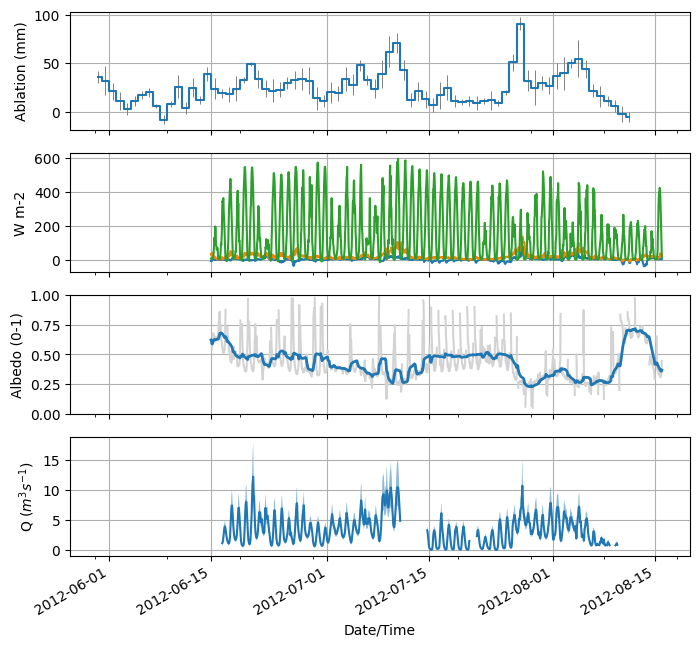

In [31]:
# Set up the figure and subplots
plt.figure(figsize=(8,8))
ax_ablat = plt.subplot(411)
ax_seb = plt.subplot(412, sharex=ax_ablat)
ax_alb = plt.subplot(413, sharex=ax_ablat)
ax_disch = plt.subplot(414, sharex=ax_ablat)

# Ablation data
ax_ablat.errorbar(ablation.index+pd.Timedelta(hours=12), ablation['Ablation [mm]'], yerr=ablation['Ablation [±]'],
                  drawstyle='steps-mid', elinewidth=0.7, ecolor='gray')
ax_ablat.grid()
ax_ablat.set_ylabel('Ablation (mm)')

# Surface energy balance data
ax_seb.plot(seb.index, seb.dlhf_u, label='Latent')
ax_seb.plot(seb.index, seb.dshf_u, label='Sensible')
ax_seb.plot(seb.index, seb.swnet, label='SWnet')
ax_seb.grid()
ax_seb.set_ylabel('W m-2')

# Albedo
# First remove invalid values, which occur during night times
seb['alb'] = seb['alb'][(seb['alb'] < 1) & (seb['alb'] > 0)]
ax_alb.plot(seb.index, seb.alb, label='Albedo', color='lightgrey')
ax_alb.plot(seb.index, seb.alb.rolling('24h').mean(), label='Albedo smoothed 24h', linewidth=2)
ax_alb.set_ylim(0, 1)
ax_alb.grid()
ax_alb.set_ylabel('Albedo (0-1)')

# Discharge at the confidence bounds
lower_q = discharge['Q hour mean [m**3/s]'] + discharge['Q hour max [m**3/s]']
upper_q = discharge['Q hour mean [m**3/s]'] - discharge['Q hour min [m**3/s]']

# Plot as a filled area
ax_disch.fill_between(lower_q.index, lower_q, upper_q, alpha=0.5)
discharge['Q hour mean [m**3/s]'].plot(ax=ax_disch)
ax_disch.grid()
ax_disch.set_ylabel(r'Q ($m^3s^{-1}$)')

# Plot vertical lines
#ax_disch.axvline('2012-07-08', color='red')

# Or plot shaded areas
#ax_disch.axvspan('2012-07-09', '2012-07-11', alpha=0.3, color='red')

La clé à regarder est l'albédo, au début de la saison, albédo assez haute et très vite une baisse de l'aldbédo = diagnostique d'un changement du soleil, on commence donc par une fonte de la neige (très courte) et après c'est clairement de la fonte de glace. L’albédo montre une chute prononcée autour du 20 juin, passant d’une valeur élevée (neige) à une valeur notablement plus basse (glace). Cette transition indique généralement la disparition quasi complète du manteau neigeux de surface, c’est-à-dire l’arrêt de la fonte de la neige et l’exposition directe de la glace.

## Questions / Exercises

### Based only on what you see in these data, do you think that you are looking at snow melt or ice melt?

### How much water flows into the moulin per day, expressed as Olympic swimming pools?

In [25]:
# Resample the discharge data to daily sums, matching sampling of ablation data
# Note the min_count is set to the number of hours in a day, so that we only
# look at days with full temporal data
# We multiply by 60secs * 60 mins to convert m3s-1 into m3day-1.
q_daily = discharge['Q hour mean [m**3/s]'].resample('1D').sum(min_count=24) * 60 * 60

In [28]:
vol_pool_m3 = 2500
# some value, go find it.....!
# now calculate the mean daily discharge and divide it by this volume.

In [29]:
(q_daily / vol_pool_m3).describe()

,Q hour mean [m**3/s]
count,44.000000
mean,125.921504
std,52.931846
min,33.377371
25%,94.590021
50%,123.185384
75%,154.061457
max,295.628411


### Is there a significant correlation between daily ablation and daily discharge?

*To answer this question you will find the code below helpful.*

In [30]:
import statsmodels.api as sm
# Do an 'Ordinary Least Squares' regression
# See https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html for more information

# Cut ablation data to same time period as discharge (discharge is shorter)
X = ablation.loc[q_daily.index[0]:q_daily.index[-1]]['Ablation [mm]']

# Get the discharge mean series
Y = q_daily

# Some days are missing data; we 'drop' (remove) those days.
model = sm.OLS(Y, sm.add_constant(X), missing='drop')

fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Q hour mean [m**3/s]   R-squared:                       0.624
Model:                              OLS   Adj. R-squared:                  0.615
Method:                   Least Squares   F-statistic:                     69.65
Date:                  Wed, 05 Nov 2025   Prob (F-statistic):           1.85e-10
Time:                          16:33:23   Log-Likelihood:                -559.31
No. Observations:                    44   AIC:                             1123.
Df Residuals:                        42   BIC:                             1126.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.286e+05   2.55e+04      5.038      0.000    7.71e+04     1.8e+05
Ablation [mm]  6012.2927    720.386      8.346      0.000    4558.495    7466.090
==============================================================================
Omnibus:                        2.113   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.348   Jarque-Bera (JB):                1.174
Skew:                           0.318   Prob(JB):                        0.556
Kurtosis:                       3.485   Cond. No.                         73.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Put your answer to this question below. Remember to consider the significance of the test result.

Text(0, 0.5, 'Disrcharge (m3/day')

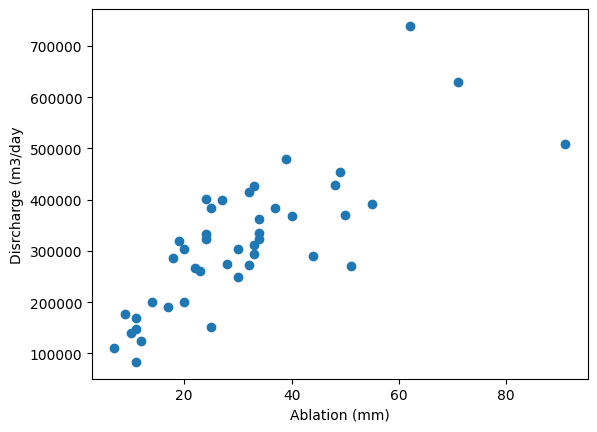

In [35]:
plt.plot(X,Y,'o')
plt.xlabel('Ablation (mm)')
plt.ylabel('Disrcharge (m3/day')



### Is this value what you expected, and why?

### When is peak daily discharge? Why might this be?

To answer this question and the next one, there are at least a couple of approaches that you could use:

- Manual visual interpretation of diurnal values
- Time series resampling -- see the `q_daily` example above, you can supply different functions to the `sum()` operation that we used there.

### When is base (minimum) daily discharge? Why might this be?

### You are following a range of other courses related to data analysis during your studies. What other technique(s) might you use to extend this analysis?